In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data_a = pd.read_csv("data_a.txt", delim_whitespace=True).to_numpy()
data_b = pd.read_csv("data_b.txt", delim_whitespace=True).to_numpy()

In [4]:
Xa = np.zeros((data_a.shape[0], 3))
Xa[:,0] = 1
Xa[:,1:] = data_a[:,1:]
Ya = data_a[:,0]

Xb = np.zeros((data_b.shape[0], 3))
Xb[:,0] = 1
Xb[:,1:] = data_b[:,1:]
Yb = data_b[:,0]

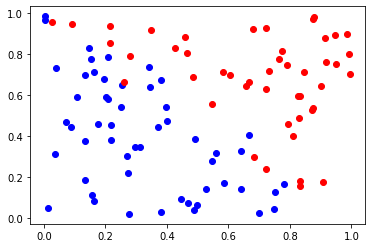

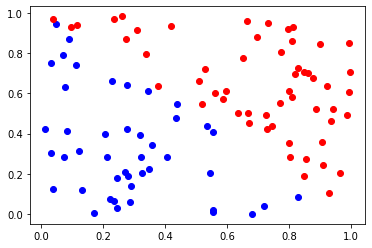

In [5]:
# Plotting data_a

for i in range(data_a.shape[0]):
    if (data_a[i, 0] < 0):
        plt.plot(data_a[i, 1], data_a[i, 2], 'bo')
    else:
        plt.plot(data_a[i, 1], data_a[i, 2], 'ro')
plt.show()

# Plotting data_b

for i in range(data_b.shape[0]):
    if (data_b[i, 0] < 0):
        plt.plot(data_b[i, 1], data_b[i, 2], 'bo')
    else:
        plt.plot(data_b[i, 1], data_b[i, 2], 'ro')
plt.show()

In [7]:
def plot_decision_boundary(X, Y, theta):
    x = np.arange(X[:,1:].min(), X[:,1:].max(), 0.001)
    plt.plot(x, (1/theta[2])*(-theta[0]-theta[1]*x), 'g--')
    for j in range(X.shape[0]):
        if (Y[j] < 0):
            plt.plot(X[j, 1], X[j, 2], 'bo')
        else:
            plt.plot(X[j, 1], X[j, 2], 'ro')
    plt.show()

==== Training model on data set A ====
Finished 10000 iterations
THETA: -20.81394174202547 21.45250214795453 19.85155266111964
Loss: 0.15988748221127655


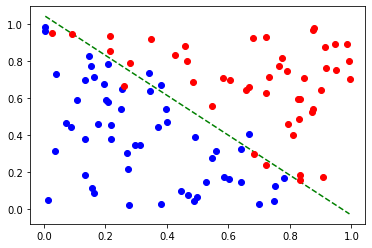


Finished 20000 iterations
THETA: -20.814377845068485 21.452951557815588 19.85198172811903
Loss: 0.15988748218387222


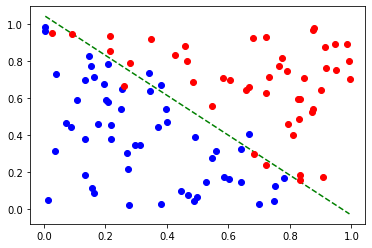


Finished 30000 iterations
THETA: -20.814377877252415 21.452951590981527 19.851981759783712
Loss: 0.1598874821838721


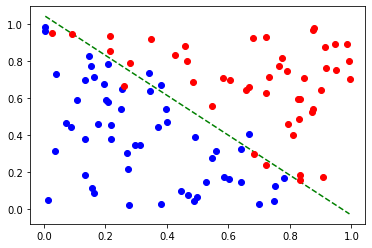


Converged in 30395 iterations

==== Training model on data set B ====
Finished 10000 iterations
THETA: -52.741092165173015 52.92982273308994 52.696914530624504
Loss: 0.03045092224758594


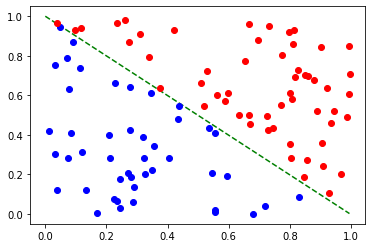


Finished 20000 iterations
THETA: -68.10040977164972 68.26496086372666 68.09888223208088
Loss: 0.023255670627267473


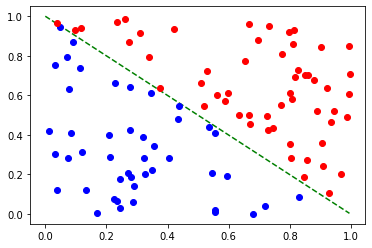


Finished 30000 iterations
THETA: -79.01759142177202 79.17745526493565 79.03755802790259
Loss: 0.019655254432929228


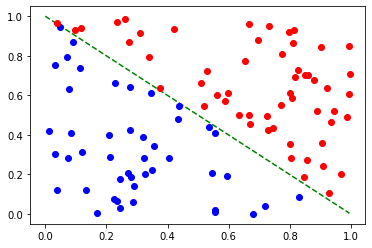


Finished 40000 iterations
THETA: -87.70771188523143 87.87276306620177 87.7389739303069
Loss: 0.017379713038351466


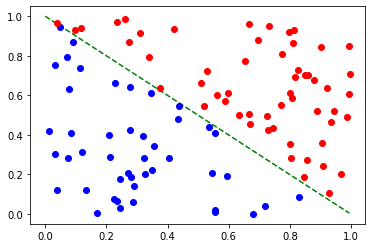


Finished 50000 iterations
THETA: -95.01838734950336 95.19482020455543 95.05519179500642
Loss: 0.01577073201872999


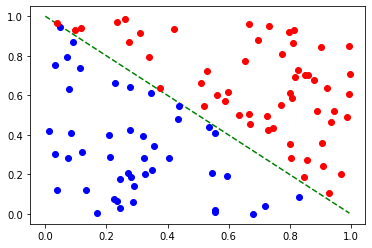

In [9]:
from __future__ import division
import numpy as np

try:
    xrange
except NameError:
    xrange = range

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X, Y):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            
            # Plot the current decision boundary
            plot_decision_boundary(X, Y, theta)
            print()
            
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
            
        # Break if i == 50000
        if (i == 50000):
            break

    return

print('==== Training model on data set A ====')
Xa, Ya = load_data("data_a.txt")
logistic_regression(Xa, Ya)

print('\n==== Training model on data set B ====')
Xb, Yb = load_data("data_b.txt")
logistic_regression(Xb, Yb)